## Setting up environment

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16988  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10272  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4751  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3733  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

100% 2.59G/2.59G [00:34<00:00, 50.0MB/s]
100% 2.59G/2.59G [00:34<00:00, 79.8MB/s]


In [ ]:
! unzip /content/ham1000-segmentation-and-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: masks/ISIC_0029321_segmentation.png  
  inflating: masks/ISIC_0029322_segmentation.png  
  inflating: masks/ISIC_0029323_segmentation.png  
  inflating: masks/ISIC_0029324_segmentation.png  
  inflating: masks/ISIC_0029325_segmentation.png  
  inflating: masks/ISIC_0029326_segmentation.png  
  inflating: masks/ISIC_0029327_segmentation.png  
  inflating: masks/ISIC_0029328_segmentation.png  
  inflating: masks/ISIC_0029329_segmentation.png  
  inflating: masks/ISIC_0029330_segmentation.png  
  inflating: masks/ISIC_0029331_segmentation.png  
  inflating: masks/ISIC_0029332_segmentation.png  
  inflating: masks/ISIC_0029333_segmentation.png  
  inflating: masks/ISIC_0029334_segmentation.png  
  inflating: masks/ISIC_0029335_segmentation.png  
  inflating: masks/ISIC_0029336_segmentation.png  
  inflating: masks/ISIC_0029337_segmentation.png  
  inflating: masks/ISIC_0029338_segmentation.png  
  inflating: masks/ISIC_0029339

## Preprocessing the data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Reading the CSV files

(450, 600, 3)


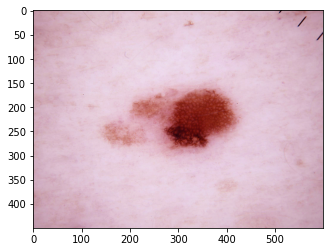

In [ ]:
img=plt.imread('/content/images/ISIC_0024313.jpg')
print(img.shape)
plt.imshow(img)

In [ ]:
df=pd.read_csv('/content/GroundTruth.csv')
print(df.head())
print(len(df))
print(df.columns)

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10015
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [ ]:
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

Adding .jpg to the image name,  so that data generator would work.

In [ ]:
df['image']=df['image'].apply(lambda x: x+ '.jpg')
print (df.head())

              image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0


There was error in ImageDataGenerator.flow_from_dataframe due to one hot encoding. So we will create a label column with 6 classes in total.

In [ ]:
label_list=[]
for i in range (len(df)):
  row= list(df.iloc[i])
  del row[0]
  index=np.argmax(row)
  label=labels[index]
  label_list.append(label)
df['label']= label_list
df=df.drop(labels, axis=1)


In [ ]:
print(df.head(10))

              image label
0  ISIC_0024306.jpg    NV
1  ISIC_0024307.jpg    NV
2  ISIC_0024308.jpg    NV
3  ISIC_0024309.jpg    NV
4  ISIC_0024310.jpg   MEL
5  ISIC_0024311.jpg    NV
6  ISIC_0024312.jpg   BKL
7  ISIC_0024313.jpg   MEL
8  ISIC_0024314.jpg    NV
9  ISIC_0024315.jpg   MEL


Train Test Validation Split

In [ ]:
train_df, d_df=train_test_split(df, train_size=0.95, shuffle=True, random_state=123)
valid_df, test_df=train_test_split(d_df, train_size=0.5, shuffle=True, random_state=123)

In [ ]:
print(train_df.head())
print(train_df['label'].value_counts())

                 image label
3231  ISIC_0027537.jpg    NV
7927  ISIC_0032233.jpg    NV
6141  ISIC_0030447.jpg    NV
5967  ISIC_0030273.jpg    NV
7336  ISIC_0031642.jpg   MEL
NV       6384
MEL      1053
BKL      1035
BCC       488
AKIEC     309
VASC      138
DF        107
Name: label, dtype: int64


The difference in distrbution in classes will tend the model to overfit on dominant classes so we will use undersampling and restrict 300 samples from each class.

In [ ]:
samples=[]
group=df.groupby('label')
for label in df['label'].unique():
    Lgroup=group.get_group(label)
    count=int(Lgroup['label'].value_counts())    
    if count>=300:
        sample=Lgroup.sample(300, axis=0)        
    else:        
        sample=Lgroup.sample(frac=1, axis=0)
    samples.append(sample) 
train_df=pd.concat(samples, axis=0).reset_index(drop=True)

In [ ]:
print (train_df['label'].value_counts())
print (len(train_df))

NV       300
MEL      300
AKIEC    300
BKL      300
BCC      300
VASC     142
DF       115
Name: label, dtype: int64
1757


## Building model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers
import cv2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_data = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.1,
                                      #zoom_range = 0.2,
                                      rotation_range = 45,
                                      horizontal_flip = True,
                                      #vertical_flip = True
                                      #validation_split = 0.2
                                )

In [ ]:
sdir = '/content/images'
img_size = (224, 224)

In [ ]:
train_generator = image_data.flow_from_dataframe( train_df, sdir, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=32)

test_generator = image_data.flow_from_dataframe( test_df, sdir, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=32)

val_generator = image_data.flow_from_dataframe( valid_df, sdir, x_col='image', y_col='label', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=32)

Found 1757 validated image filenames belonging to 7 classes.
Found 251 validated image filenames belonging to 7 classes.
Found 250 validated image filenames belonging to 7 classes.


As two classes, VASC and DF are having samples less than 300, so we are gonna initialize the weights to compensate the imbalance.

In [ ]:
c_weight={}
train_dict=train_generator.class_indices
classes=list(train_dict.keys())
class_count=len(classes)
labels=train_generator.labels
count_array=np.zeros((class_count))
for value in train_dict.values(): # these are the integer values of the labels
    for label in labels: # iterate through the train_gen labels   
        if label==value:
            count_array[value] +=1    
#print (count_array)
max_samples=np.max(count_array)
max_index=np.argmax(count_array)
max_class=classes[max_index]
print('class ', max_class,' with ', max_samples, 'samples has the largest sample size')
msg='{0:^30s}{1:^10s}{2:^9s}'.format('Class', 'Samples', 'Weight')
print(msg)
for i in range (class_count):
    c_weight[i]= max_samples/count_array[i]
    msg=f'{classes[i]:^30s}{str(count_array[i]):^10s}{c_weight[i]:^9.5f}'
    print(msg)

class  AKIEC  with  300.0 samples has the largest sample size
            Class              Samples   Weight  
            AKIEC               300.0    1.00000 
             BCC                300.0    1.00000 
             BKL                300.0    1.00000 
              DF                115.0    2.60870 
             MEL                300.0    1.00000 
              NV                300.0    1.00000 
             VASC               142.0    2.11268 


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

#####VGG16 

In [ ]:
vggmodel =VGG16(weights='imagenet', include_top = False, input_shape = (224, 224, 3),pooling='max')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vggmodel.layers[0:15]:
  layer.trainable = False

In [ ]:
x = vggmodel.output
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)

model = models.Model(inputs=vggmodel.input, outputs=x)

#####EfficientNet B0

In [ ]:
efficientnetb0model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top = False, input_shape = (224, 224, 3),pooling='max')

16719872/16705208 [==============================] - 0s 0us/step


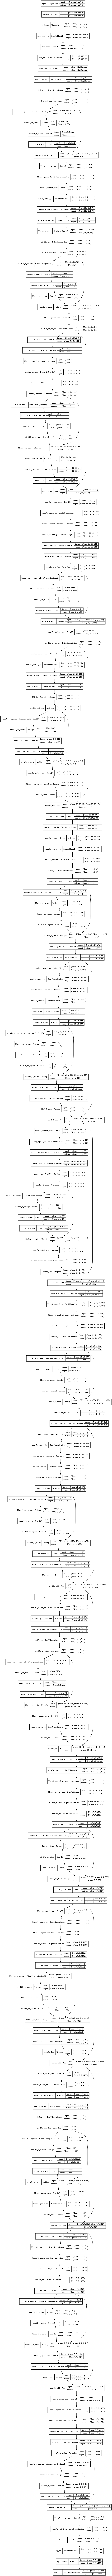

In [ ]:
tf.keras.utils.plot_model(efficientnetb0model, "effnetb0.png", show_shapes=True)

In [ ]:
#for layer in vggmodel.layers[0:15]:
 # layer.trainable = False

In [ ]:
efficientnetb0model.trainable = True

In [ ]:
for layer in efficientnetb0model.layers[-20:]:
  if not isinstance(layer, layers.BatchNormalization):
    layer.trainable = True

In [ ]:
x = efficientnetb0model.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)

model = models.Model(inputs=efficientnetb0model.input, outputs=x)

#####Training the model

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

#optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01)
optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01)


model.compile(loss='binary_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

earlystopper = EarlyStopping(patience=8, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-7, verbose=1)

In [ ]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 75,
                    shuffle = True,
                    callbacks=[reduce_lr],
                    class_weight = c_weight)

Epoch 1/75
55/55 [==============================] - 93s 1s/step - loss: 7.3111 - accuracy: 0.1668 - val_loss: 0.5493 - val_accuracy: 0.1360 - lr: 0.0100
Epoch 2/75
55/55 [==============================] - 48s 863ms/step - loss: 0.6074 - accuracy: 0.1565 - val_loss: 0.4709 - val_accuracy: 0.1360 - lr: 0.0100
Epoch 3/75
55/55 [==============================] - 47s 860ms/step - loss: 0.5414 - accuracy: 0.1690 - val_loss: 0.4349 - val_accuracy: 0.6320 - lr: 0.0100
Epoch 4/75
55/55 [==============================] - 47s 858ms/step - loss: 0.5120 - accuracy: 0.1269 - val_loss: 0.4203 - val_accuracy: 0.6320 - lr: 0.0100
Epoch 5/75
55/55 [==============================] - 48s 864ms/step - loss: 0.4992 - accuracy: 0.1286 - val_loss: 0.4143 - val_accuracy: 0.0200 - lr: 0.0100
Epoch 6/75
55/55 [==============================] - 48s 865ms/step - loss: 0.4938 - accuracy: 0.0655 - val_loss: 0.4117 - val_accuracy: 0.0200 - lr: 0.0100
Epoch 7/75
55/55 [==============================] - 47s 860ms/step 

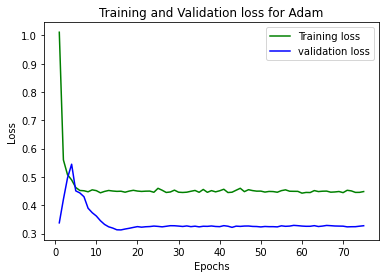

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,76)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

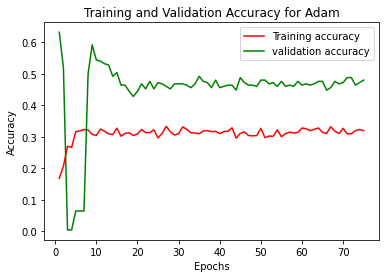

In [ ]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,76)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='validation accuracy')
plt.title('Training and Validation Accuracy for Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/effnetb0skin.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from keras.models import load_model

In [ ]:
test_model = load_model('effnetb0skin.h5')

In [ ]:
yy = test_model.predict(test_generator)

In [ ]:
test_model.evaluate(test_generator)

8/8 [==============================] - 7s 660ms/step - loss: 6.4659 - accuracy: 0.0279


[6.4658966064453125, 0.027888447046279907]

In [ ]:
print(yy[23])

[9.9999988e-01 1.2390564e-18 1.2157292e-07 1.4841012e-23 1.5597163e-22
 5.4735732e-23 2.1115546e-31]


In [ ]:
yyy = np.argmax(yy, axis = 1)

In [ ]:
print(yyy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
ytrue = test_generator.classes

In [ ]:
print(ytrue)

[4, 5, 5, 5, 5, 5, 4, 5, 1, 5, 2, 5, 1, 2, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 0, 5, 5, 5, 4, 0, 2, 5, 5, 2, 2, 5, 5, 5, 0, 4, 4, 5, 2, 4, 4, 2, 5, 5, 5, 6, 5, 2, 2, 5, 4, 0, 2, 5, 2, 5, 5, 1, 5, 5, 1, 5, 5, 5, 0, 4, 5, 5, 5, 5, 5, 5, 4, 3, 2, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 1, 5, 2, 2, 4, 0, 5, 5, 5, 5, 4, 2, 2, 5, 5, 5, 5, 4, 5, 5, 1, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 1, 5, 5, 5, 2, 2, 4, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 0, 6, 2, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 1, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5, 4, 1, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 5, 2, 2, 5, 5, 5, 2, 5, 4, 5, 5, 3, 5, 4, 2, 6, 5, 5, 4, 2, 5, 4]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, yyy
                            #, labels=['Mask','Non Mask']
                            ))

              precision    recall  f1-score   support

           0       0.03      1.00      0.05         7
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       163
           6       0.00      0.00      0.00         3

    accuracy                           0.03       251
   macro avg       0.00      0.14      0.01       251
weighted avg       0.00      0.03      0.00       251



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
